In [1]:
import time
import tclab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gekko import GEKKO

In [14]:
t_heat = 300 # seconds

with tclab.TCLab() as lab:
    h = tclab.Historian(lab.sources)
    for t in tclab.clock(t_heat):
        lab.Q1(50)
        h.update(t)
        print("Time:", t, 'seconds')

TCLab version 0.4.9
Arduino Leonardo connected on port COM3 at 115200 baud.
TCLab Firmware 1.4.3 Arduino Leonardo/Micro.
Time: 0 seconds
Time: 1.0 seconds
Time: 2.0 seconds
Time: 3.0 seconds
Time: 4.0 seconds
Time: 5.0 seconds
Time: 6.0 seconds
Time: 7.0 seconds
Time: 8.0 seconds
Time: 9.0 seconds
Time: 10.0 seconds
Time: 11.0 seconds
Time: 12.0 seconds
Time: 13.0 seconds
Time: 14.0 seconds
Time: 15.0 seconds
Time: 16.0 seconds
Time: 17.0 seconds
Time: 18.0 seconds
Time: 19.0 seconds
Time: 20.0 seconds
Time: 21.0 seconds
Time: 22.0 seconds
Time: 23.0 seconds
Time: 24.0 seconds
Time: 25.0 seconds
Time: 26.0 seconds
Time: 27.0 seconds
Time: 28.0 seconds
Time: 29.0 seconds
Time: 30.0 seconds
Time: 31.0 seconds
Time: 32.0 seconds
Time: 33.0 seconds
Time: 34.0 seconds
Time: 35.0 seconds
Time: 36.0 seconds
Time: 37.0 seconds
Time: 38.0 seconds
Time: 39.0 seconds
Time: 40.0 seconds
Time: 41.0 seconds
Time: 42.0 seconds
Time: 43.0 seconds
Time: 44.0 seconds
Time: 45.0 seconds
Time: 46.0 second

In [18]:
df = pd.DataFrame(h.log, columns=h.columns)

In [20]:
# Solve with GEKKO

# m * cp * dT/dt = U * A * (Ta - T) + alpha * Q
mass = 0.004   # kg
cp = 500       # J/kg-K
U = 10         # W/m^2-K
A = 0.0012     # m^2
Ta = 23        # degree Celsius
alpha = 0.01   # W/%
Q = 50         # %

m = GEKKO()
secs, resolution = 300, 10
m.time = np.linspace(0, secs, secs * resolution + 1)

Q_step = Q * np.ones(secs * resolution + 1)
Q = m.Param(value=Q_step) 

T = m.Var(Ta) # Variable with initial condition
m.Equation(mass * cp * T.dt() == U * A * (Ta - T) + alpha * Q)

m.options.IMODE = 4 # dynamic simulation
m.solve(disp=False)

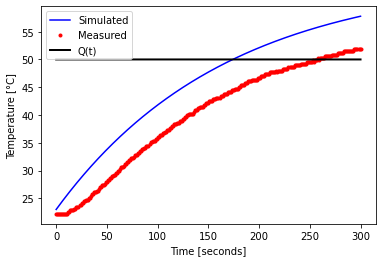

In [22]:
plt.plot(m.time, T, 'b-', label=r'Simulated')
plt.plot(df.Time, df.T1, 'r.', label='Measured')
plt.plot(m.time, Q_step, 'k-', linewidth=2, label=r'Q(t)')
plt.xlabel('Time [seconds]')
plt.ylabel('Temperature [°C]')
plt.legend()
plt.show()